In [63]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as md
import datetime as dt
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [64]:
#adding moving average, price and volume

In [65]:
data = pd.read_csv('cleaned_tweets_without_dupes_120323.csv', lineterminator='\n')

In [95]:
data.shape

(347668, 9)

In [67]:
def tweet_daily_rate(data1):
    data1['datetime'] = pd.to_datetime(data1['datetime'])
    data1['hour'] = data1['datetime'].dt.hour
    data1['date'] = data1['datetime'].dt.date
    data2 = data1.groupby(['date', 'hour']).agg({'negative_bert':'mean',
                                                 'neutral_bert':'mean',
                                                 'positive_bert':'mean',
                                                 'text':'count',
                                                 'datetime': lambda x: x.max() - x.min()})

    data2['datetime_seconds'] = data2['datetime'].dt.total_seconds()
    data2['tweets_rate'] = data2['text']/(data2['datetime_seconds'])
    data2 = data2.groupby('date').agg({'tweets_rate':'mean'})
    data2['daily_tweets'] = data2['tweets_rate']*86400
    data2 = data2['daily_tweets']
    return data2

def daily_data(data, filename):
    data2 = tweet_daily_rate(data)
    data['MA7_Sentiment'] = data['positive_bert'].rolling(window=8).mean()
    data['MA20_Sentiment'] = data['positive_bert'].rolling(window=21).mean()
    data['MA50_Sentiment'] = data['positive_bert'].rolling(window=51).mean()
    #add bitcoin price and save to CSV called BTC_price
    data = data.reset_index()
    data['date']=pd.to_datetime(data['date'])
    data['daily_tweets'] = data2.reset_index()['daily_tweets']
    data['BTC_price']=BTC_price.reset_index()['Adj Close']
    data = data[['date','negative_bert', 'neutral_bert', 'positive_bert',
       'daily_tweets', 'MA7_Sentiment', 'MA20_Sentiment',
       'MA50_Sentiment', 'BTC_price']]
    data.to_csv(f'{fliename}.csv')
    return data    

In [68]:
data3 = tweet_daily_rate(data)

In [69]:
data3

date
2021-01-01     12561.859509
2021-01-02     30124.352145
2021-01-03     26167.331282
2021-01-04     18041.199084
2021-01-05     17473.551568
                  ...      
2023-03-05     14968.952910
2023-03-06    137824.833122
2023-03-07     19028.050010
2023-03-08     19216.616481
2023-03-09     11235.164835
Name: daily_tweets, Length: 798, dtype: float64

In [70]:
mask = data['date'] == '2023-03-06'

In [72]:
anomalous_day = data[mask]

In [73]:
anomalous_day.groupby(by='hour').agg({'datetime': lambda x: x.max() - x.min()})

,datetime
hour,


In [74]:
anomalous_day['text'][346441]

KeyError: 346441

In [ ]:
data2 = data.groupby(by='date').mean()

In [75]:
data3 = tweet_daily_rate(data)

In [76]:
data2['tweet_rate'] = data3.reset_index()['daily_tweets']

In [77]:
data2['date'][794]

Timestamp('2023-03-06 00:00:00')

In [78]:
data2['MA7_Sentiment'] = data2['positive_bert'].rolling(window=8).mean()
data2['MA20_Sentiment'] = data2['positive_bert'].rolling(window=21).mean()
data2['MA50_Sentiment'] = data2['positive_bert'].rolling(window=51).mean()

In [79]:
BTC_price = pd.read_csv('../raw_data/2021-01-01_2023-03-10_BTC-USD_1d.csv')

In [80]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            798 non-null    datetime64[ns]
 1   negative_bert   798 non-null    float64       
 2   neutral_bert    798 non-null    float64       
 3   positive_bert   798 non-null    float64       
 4   tweet_rate      798 non-null    float64       
 5   MA7_Sentiment   791 non-null    float64       
 6   MA20_Sentiment  778 non-null    float64       
 7   MA50_Sentiment  748 non-null    float64       
 8   BTC_price       798 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 56.2 KB


In [81]:
data2['BTC_price']=BTC_price.reset_index()['Adj Close']

In [82]:
data2 = data2.reset_index()

In [83]:
data2['date']=pd.to_datetime(data2['date'])

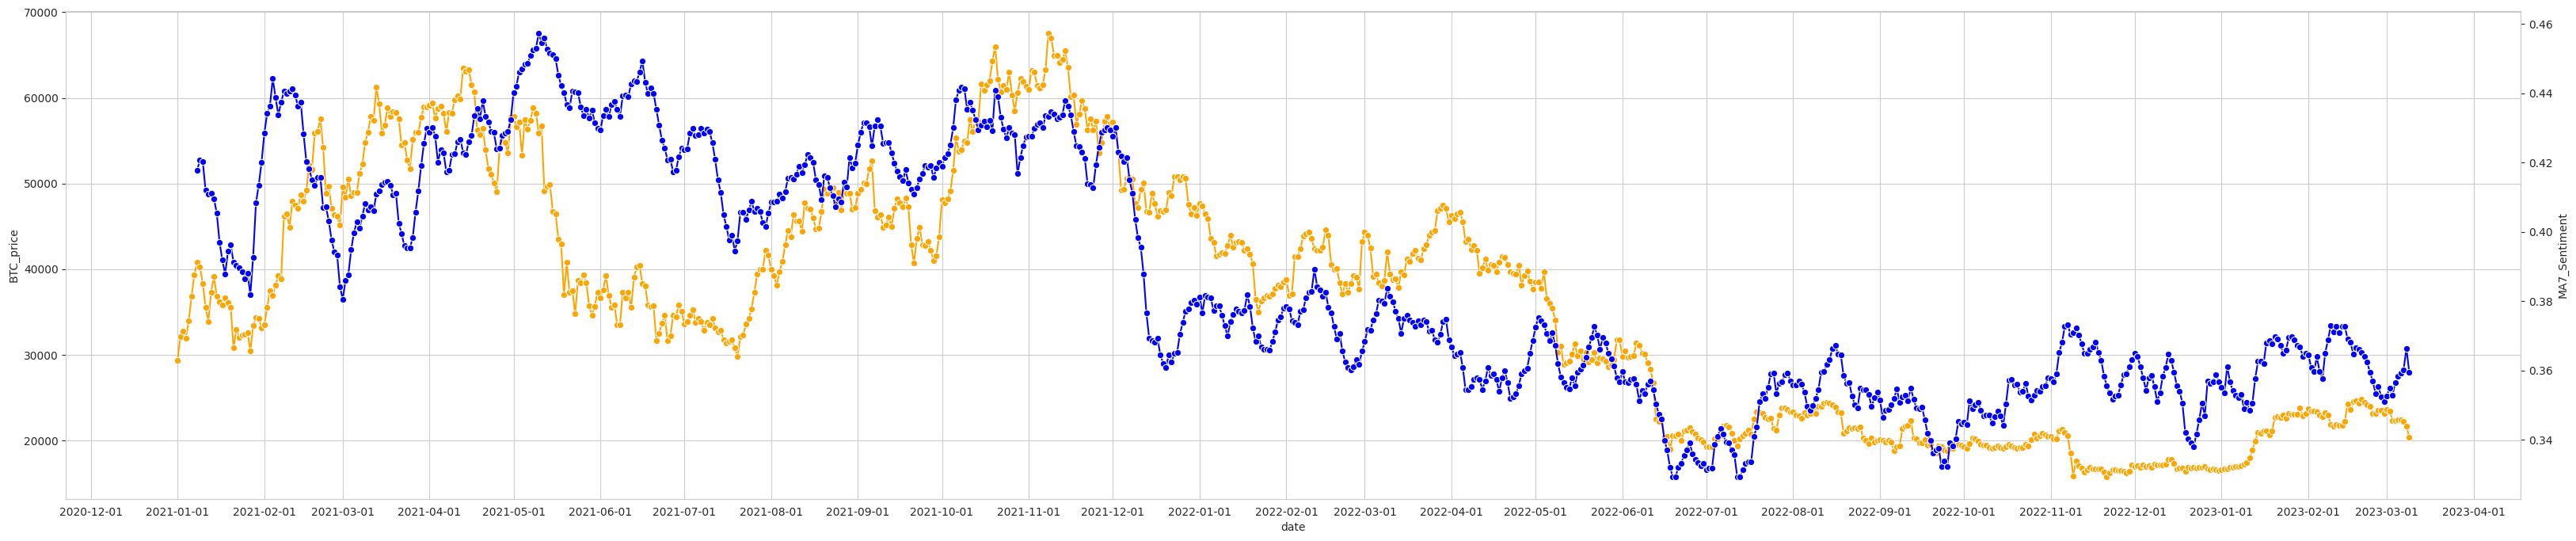

In [84]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style("whitegrid")
# ax1 = sns.color_palette('bright')

fig, ax1 = plt.subplots(figsize=(40,8))

sns.lineplot(x = data2['date'], y=data2['BTC_price'], marker='o', sort = False, color='orange')

ax2 = ax1.twinx()
sns.lineplot(x = data2['date'], y=data2['MA7_Sentiment'], marker='o', sort = False, ax=ax2, color='blue').set_xticklabels
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

# ax3 = ax1.twinx()
# sns.lineplot(x = data2['date'], y=data2['tweet_rate'], marker='o', sort = False, ax=ax2, color='red').set_xticklabels


plt.grid()


In [85]:
#make graph for positive:neutral:negative sentiment over the last 50 days 

In [86]:
data2.head()

,index,date,negative_bert,neutral_bert,positive_bert,tweet_rate,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price
0,0,2021-01-01,0.083330,0.493347,0.423323,12561.859509,NaN,NaN,NaN,29374.152344
1,1,2021-01-02,0.134531,0.438811,0.426658,30124.352145,NaN,NaN,NaN,32127.267578
2,2,2021-01-03,0.147802,0.428930,0.423267,26167.331282,NaN,NaN,NaN,32782.023438
3,3,2021-01-04,0.104159,0.507274,0.388567,18041.199084,NaN,NaN,NaN,31971.914062
4,4,2021-01-05,0.081743,0.521464,0.396793,17473.551568,NaN,NaN,NaN,33992.429688


In [87]:
data2['daily_tweets'] = data3.reset_index()['daily_tweets']
data2['BTC_price']=BTC_price.reset_index()['Adj Close']

In [144]:
data3 = data2.iloc[-50:]
data3['pos_neg_ratio'] = data3['positive_bert']/data3['negative_bert']
data3['pos_neg_ratio'] = data3['positive_bert']/data3['negative_bert']
max_ = data3['positive_bert'].max()
min_ = data3['positive_bert'].min()
data3['pos_adj'] = ((data3['positive_bert'])/(data3['positive_bert'] + data3['negative_bert']))
data3['neg_adj'] = ((data3['negative_bert'])/(data3['positive_bert'] + data3['negative_bert']))


/tmp/ipykernel_13028/3378862787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['pos_neg_ratio'] = data3['positive_bert']/data3['negative_bert']
/tmp/ipykernel_13028/3378862787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['pos_neg_ratio'] = data3['positive_bert']/data3['negative_bert']
/tmp/ipykernel_13028/3378862787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [145]:
min_

0.3031625991830986

0.3031625991830986

In [146]:
data3.head()

,date,negative_bert,neutral_bert,positive_bert,tweet_rate,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,pos_neg_ratio,pos_adj,neg_adj
748,2023-01-19,0.112547,0.532842,0.354611,18453.067298,0.367810,0.358020,0.355650,21086.792969,3.150781,0.759082,0.240918
749,2023-01-20,0.091489,0.521419,0.387091,20340.646896,0.369688,0.359257,0.355781,22676.552734,4.231000,0.808832,0.191168
750,2023-01-21,0.113458,0.510576,0.375965,18281.472639,0.369155,0.360437,0.355857,22777.625000,3.313685,0.768180,0.231820
751,2023-01-22,0.102223,0.517583,0.380194,17071.681657,0.367219,0.362081,0.356340,22720.416016,3.719257,0.788102,0.211898
752,2023-01-23,0.073466,0.587847,0.338687,18960.758766,0.365026,0.361558,0.356330,22934.431641,4.610098,0.821750,0.178250


In [88]:
plt.stackplot(data3.date, data3.neg_adj, data3.MA7_Sentiment)

AttributeError: 'Series' object has no attribute 'date'

In [89]:
data2.tail()

,index,date,negative_bert,neutral_bert,positive_bert,tweet_rate,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,daily_tweets
793,793,2023-03-05,0.107813,0.541465,0.350722,14968.952910,0.358301,0.358391,0.363660,22435.513672,14968.952910
794,794,2023-03-06,0.109010,0.507571,0.383419,137824.833122,0.359351,0.359776,0.363419,22429.757812,137824.833122
795,795,2023-03-07,0.123972,0.520640,0.355388,19028.050010,0.360315,0.359762,0.363403,22219.769531,19028.050010
796,796,2023-03-08,0.087879,0.515427,0.396694,19216.616481,0.366446,0.360095,0.364243,21718.080078,19216.616481
797,797,2023-03-09,0.103576,0.593262,0.303163,11235.164835,0.359564,0.356971,0.363114,20363.021484,11235.164835


In [ ]:
# sns.lineplot(data = data2['BTC_price_adjclose'], marker='o', sort = False)
# sns.lineplot(data = data2['MA7_Sentiment'], marker='o', sort = False)

sns.lineplot(data=data3)

<Axes: >

In [ ]:
data2['bitcoin_volume'] = BTC_price['Volume']

In [93]:
data2.tail()

,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price
793,2023-03-05,0.107813,0.541465,0.350722,14968.952910,0.358301,0.358391,0.363660,22435.513672
794,2023-03-06,0.109010,0.507571,0.383419,137824.833122,0.359351,0.359776,0.363419,22429.757812
795,2023-03-07,0.123972,0.520640,0.355388,19028.050010,0.360315,0.359762,0.363403,22219.769531
796,2023-03-08,0.087879,0.515427,0.396694,19216.616481,0.366446,0.360095,0.364243,21718.080078
797,2023-03-09,0.103576,0.593262,0.303163,11235.164835,0.359564,0.356971,0.363114,20363.021484


In [91]:
data2 = data2[['date','negative_bert', 'neutral_bert', 'positive_bert',
       'daily_tweets', 'MA7_Sentiment', 'MA20_Sentiment',
       'MA50_Sentiment', 'BTC_price']]

In [ ]:
# data2 = data2.rename(columns={"negative_bert": "average_neg", "neutral_bert": "average_neu", "positive_bert": "average_pos", 'BTC_new':'BTC_price'}),

In [94]:
data2.to_csv('all_columns_daily_090323.csv')